In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
#Variables
data_path = os.path.join('..','data')
img_path = os.path.join('..','static','images')

nt = "#61BED6"
nf = "#A386B4"
sj = "#56AC8A"
sp = "#DFC10C"

colors_d = {
    'ENTP':nt,
    'INTP':nt,
    'INTJ':nt,
    'ENTJ':nt,
    'INFJ':nf,
    'ENFJ':nf,
    'INFP':nf,
    'ENFP':nf,
    'ISFJ':sj,
    'ISTJ':sj,
    'ESTJ':sj,
    'ESFJ':sj,
    'ISFP':sp,
    'ISTP':sp,
    'ESTP':sp,
    'ESFP':sp
    }

In [6]:
#Pull in csv
mbti = pd.read_csv(os.path.join('..','data','clean_data_3.csv'))

In [7]:
mbti.columns.tolist()

['type',
 'is_Extrovert',
 'is_Sensing',
 'is_Thinking',
 'is_Judging',
 'posts',
 'clean_posts',
 'compound_sentiment',
 'pos_sentiment',
 'neg_sentiment',
 'neu_sentiment',
 'tag_posts',
 'qm',
 'em',
 'colons',
 'emojis',
 'word_count',
 'unique_words',
 'post_length_var',
 'upper',
 'link_count',
 'ellipses',
 'img_count']

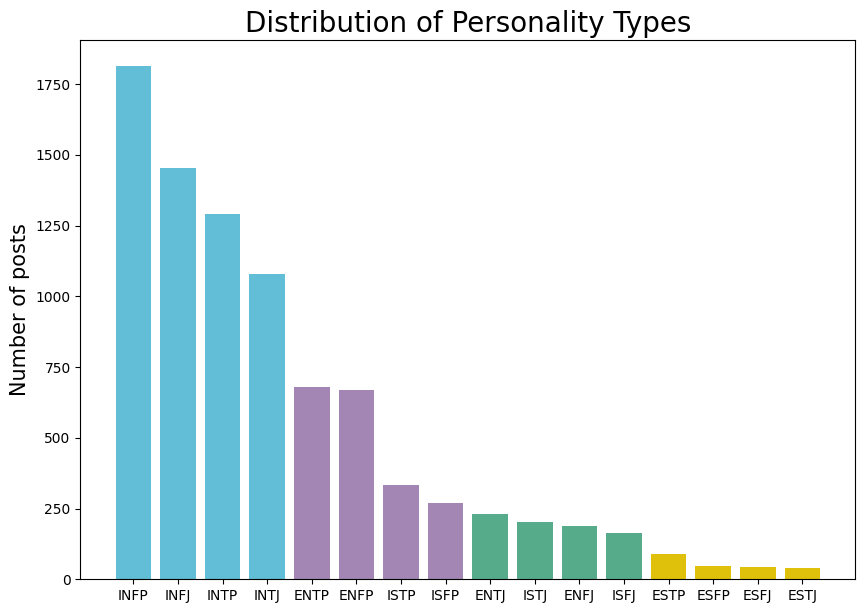

In [8]:
mb = mbti.groupby('type').agg({'type':'count'}).rename(columns={'type':'count'}).sort_values('count',ascending=False)
sorted(colors_d.items(), key=lambda pair: mb.index.tolist().index(pair[0]))
plt.figure(figsize=(10,7))
plt.title("Distribution of Personality Types", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.bar(mb.index, mb['count'], color=list(colors_d.values()))
plt.savefig(os.path.join(img_path,"type_hist.png"))
plt.show()

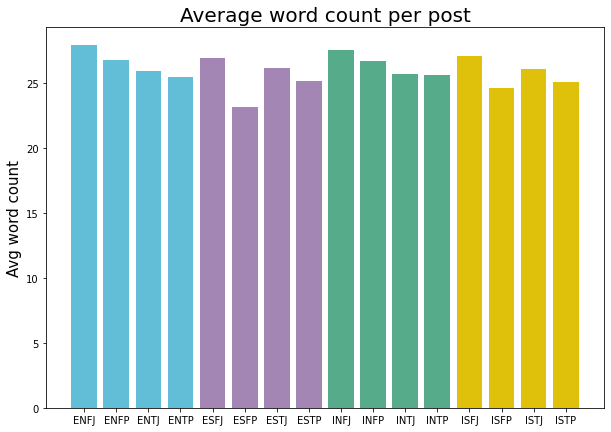

In [12]:
avg_words_type = mbti.groupby('type').agg({'avg_word_ct':'median'})
sorted(colors_d.items(), key=lambda pair: avg_words_type.index.tolist().index(pair[0]))
plt.figure(figsize=(10,7))
plt.title("Average word count per post", fontsize=20)
plt.ylabel("Avg word count", fontsize=15)
plt.bar(avg_words_type.index,avg_words_type['avg_word_ct'], color=list(colors_d.values()))
plt.savefig(os.path.join(img_path,"avg_words.png"))
plt.show()

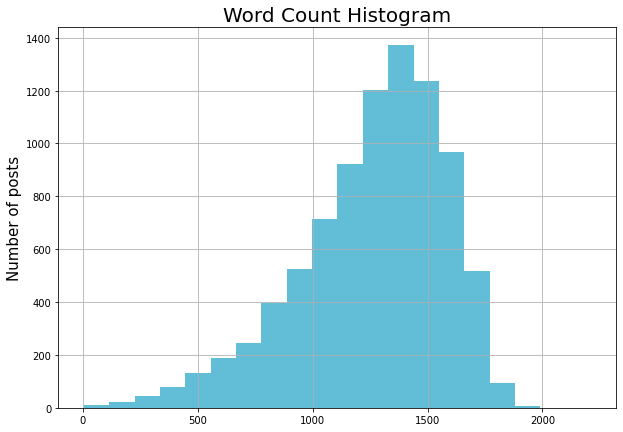

In [14]:
plt.figure(figsize=(10,7))
plt.title("Word Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
mbti['word_count'].hist(bins=20, color=nt)
plt.savefig(os.path.join(img_path,"word_hist.png"))
plt.show()

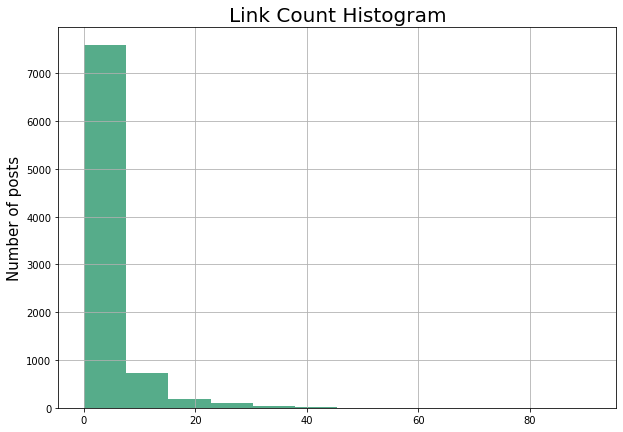

In [18]:
plt.figure(figsize=(10,7))
plt.title("Link Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
mbti['link_count'].hist(bins=12, color=sj)
plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

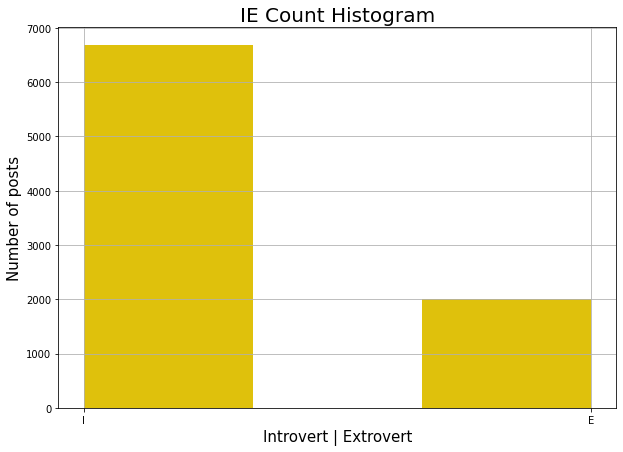

In [21]:
plt.figure(figsize=(10,7))
plt.title("IE Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.xlabel("Introvert | Extrovert", fontsize=15)
mbti['is_Extrovert'].replace(0,'I').replace(1,'E').hist(bins=3, color=sp)
# plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

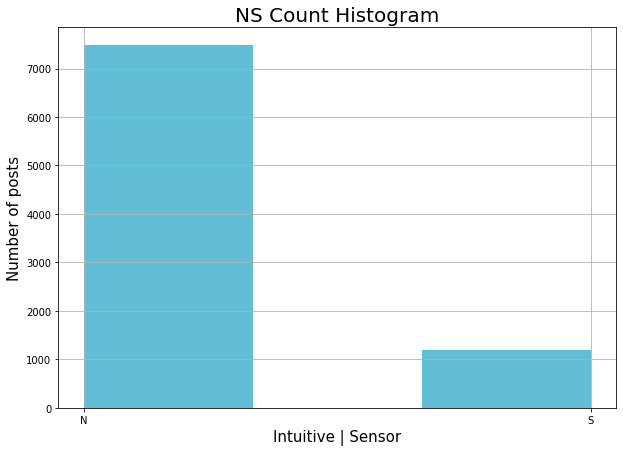

In [26]:
plt.figure(figsize=(10,7))
plt.title("NS Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.xlabel("Intuitive | Sensor", fontsize=15)
mbti['is_Sensing'].replace(0,'N').replace(1,'S').hist(bins=3, color=nt)
# plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

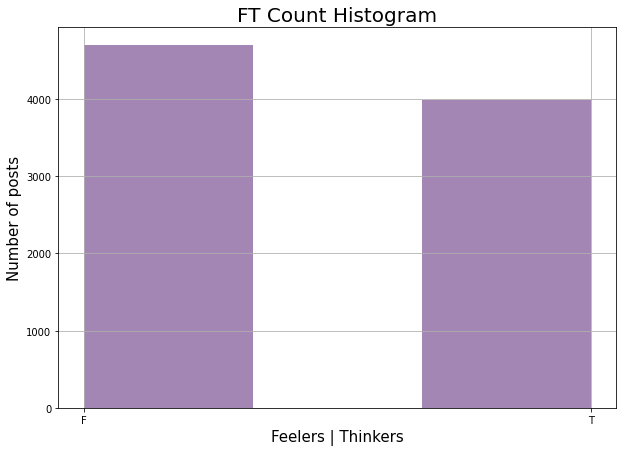

In [28]:
plt.figure(figsize=(10,7))
plt.title("FT Count Histogram", fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.xlabel("Feelers | Thinkers", fontsize=15)
mbti['is_Thinking'].replace(0,'F').replace(1,'T').hist(bins=3,color=nf)
# plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

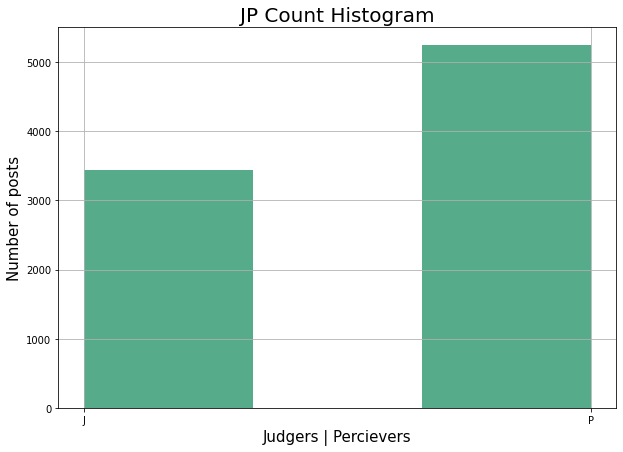

In [29]:
plt.figure(figsize=(10,7))
plt.title("JP Count Histogram",fontsize=20)
plt.ylabel("Number of posts", fontsize=15)
plt.xlabel("Judgers | Percievers", fontsize=15)
mbti['is_Judging'].replace(0,'P').replace(1,'J').hist(bins=3, color=sj)
# plt.savefig(os.path.join(img_path,"link_hist.png"))
plt.show()

#### Word Clouds

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace = .1, wspace=.1)
ax = ax.ravel()

for i, mbti_type in enumerate(mbti["type"].unique()):
        wordcloud_words = " ".join(mbti[mbti["type"]==mbti_type]["clean_post"])
        wordcloud = WordCloud(height=500).generate(wordcloud_words)
        ax[i].imshow(wordcloud, interpolation = 'bilinear')
        ax[i].axis("off")
        ax[i].set_title(mbti_type)

#### Word Count by Type